Input/output locations

In [120]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/figures/review_pyper_performance'

In [121]:
csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/review_pyper_tracking/review_pyper_cost.csv'

Create Your Own Data PRN

In [122]:
import pandas as pd
df = pd.read_csv(csv_path)
df

,Question,GPT-4,GPT-3.5,GPT-4 Cost Reduced,GPT-3.5 Cost Reduced
0,1,1000,16,1050,16.8
1,2,2000,32,1100,17.6
2,3,3000,48,1150,18.4
3,4,4000,64,1200,19.2
4,5,5000,80,1250,20.0


id_vars is the variable that you will use for your x-axis

In [123]:
# Melt the DataFrame to reshape it for plotting
melted = pd.melt(df, id_vars=['Question'])
melted

,Question,variable,value
0,1,GPT-4,1000.0
1,2,GPT-4,2000.0
2,3,GPT-4,3000.0
3,4,GPT-4,4000.0
4,5,GPT-4,5000.0
5,1,GPT-3.5,16.0
6,2,GPT-3.5,32.0
7,3,GPT-3.5,48.0
8,4,GPT-3.5,64.0
9,5,GPT-3.5,80.0


In [127]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def _split_labels(x_col):
    try:
        return ['\n'.join(label.split('|')) for label in df[x_col].unique()]
    except:
        return None

def create_line_plot(df, x_col='Question', y_col='value', hue_col='variable', 
                     title='Cost to Phenotype 1000 Patients',
                     x_label='Symptoms Phenotyped (Questions Asked)', y_label='Cost Per Question (USD)', 
                     legend_title='', legend_loc='upper left',
                     fig_size=(10, 6), output_path=None):
    """
    Create a line plot using seaborn with customizable parameters using a melted (long) dataframe
    """
    # Define color palette
    palette = sns.color_palette('tab10')
    
    # Create the plot
    plt.figure(figsize=fig_size)
    sns.lineplot(data=df, 
                 x=x_col, 
                 y=y_col, 
                 hue=hue_col, 
                 style=hue_col,
                 markers='o', 
                 dashes=False, 
                 palette=palette,
                 estimator='mean', 
                 errorbar='se')

    plt.rcParams.update({'font.family': 'Helvetica', 'font.size': 16})
    plt.xticks(fontfamily='Helvetica', fontsize=14, rotation=0, ha='center')
    if _split_labels(x_col) is not None:
        plt.gca().set_xticklabels(_split_labels(x_col))
    plt.yticks(fontfamily='Helvetica', fontsize=14)
    
    plt.legend(title=legend_title, loc=legend_loc, frameon=False)
    plt.title(title)
    plt.xlabel(x_label, fontfamily='Helvetica', fontsize=16)
    plt.ylabel(y_label, fontfamily='Helvetica', fontsize=16)
    sns.despine()
    plt.grid(False)
    
    if output_path:
        f_out = os.path.join(output_path, 'lineplot.svg')
        plt.savefig(f_out)
    
    plt.show()

In [128]:
9

9

/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_7649/1323002722.py:25: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(data=df,
/var/folders/82/946tskyj68b6htgvndtppmz80000gp/T/ipykernel_7649/1323002722.py:25: UserWarning: 
The markers list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df,
/Users/cu135/Software_Local/calvin_utils_project/.venv_calvin/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cu135/Software_Local/calvin_utils_project/.venv_calvin/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating i

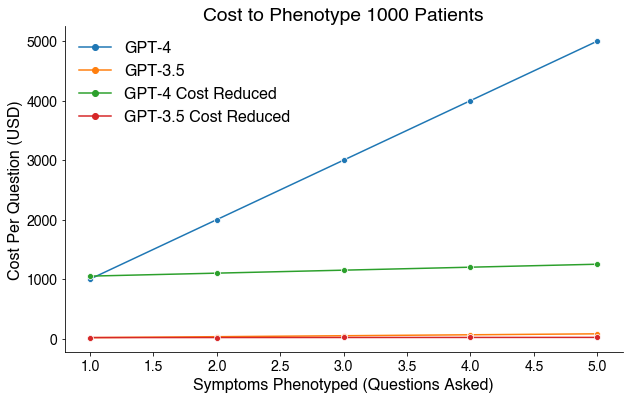

In [129]:
create_line_plot(melted, output_path=out_dir)

Exptl